In [1]:
%pylab inline
# We run the following SciPy and NumPy code in [1] 
# and generate the plots mentioned above using Matplotlib 

# load the UN dataset transformed to float with 4 numeric columns, 
# lifeMale,lifeFemale,infantMortality and GDPperCapita

fName = ('../datasets/UN4col.csv')
fp = open(fName)
X = np.loadtxt(fp)
fp.close()

Populating the interactive namespace from numpy and matplotlib


In [2]:
import numpy as np
from scipy.cluster.vq import kmeans,vq
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt

##### cluster data into K=1..10 clusters #####
#K, KM, centroids,D_k,cIdx,dist,avgWithinSS = kmeans.run_kmeans(X,10)

K = range(1,10)

  # scipy.cluster.vq.kmeans
KM = [kmeans(X,k) for k in K] # apply kmeans 1 to 10
centroids = [cent for (cent,var) in KM]   # cluster centroids

D_k = [cdist(X, cent, 'euclidean') for cent in centroids]

cIdx = [np.argmin(D,axis=1) for D in D_k]
dist = [np.min(D,axis=1) for D in D_k]
avgWithinSS = [sum(d)/X.shape[0] for d in dist]  

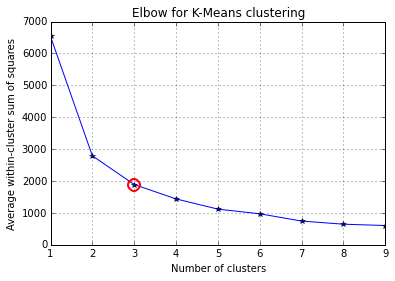

In [3]:
kIdx = 2
# plot elbow curve
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(K, avgWithinSS, 'b*-')
ax.plot(K[kIdx], avgWithinSS[kIdx], marker='o', markersize=12, 
      markeredgewidth=2, markeredgecolor='r', markerfacecolor='None')
plt.grid(True)
plt.xlabel('Number of clusters')
plt.ylabel('Average within-cluster sum of squares')
tt = plt.title('Elbow for K-Means clustering')

In [8]:
from sklearn.cluster import KMeans
km = KMeans(3, init='k-means++') # initialize
km.fit(X)
c = km.predict(X) # classify into three clusters

In [13]:
# see the code in helper library kmeans.py
# it wraps a number of variables and maps integers to categoriy labels
# this wrapper makes it easy to interact with this code and try other variables
# as we see below in the next plot
import kmeans as mykm
(pl0,pl1,pl2) = mykm.plot_clusters(X,c,3,2) # column 3 GDP, vs column 2 infant mortality. Note indexing is 0 based

AttributeError: 'module' object has no attribute 'plot_clusters'